In [2]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [3]:

data = pd.read_csv('online_shoppers_intention.csv')
data.shape

(12330, 18)

In [4]:

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
#Handling empty cells
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:

missing_percentage = data.isnull().sum()/data.shape[0]
print(missing_percentage)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64


## Revenue

In [10]:
data['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

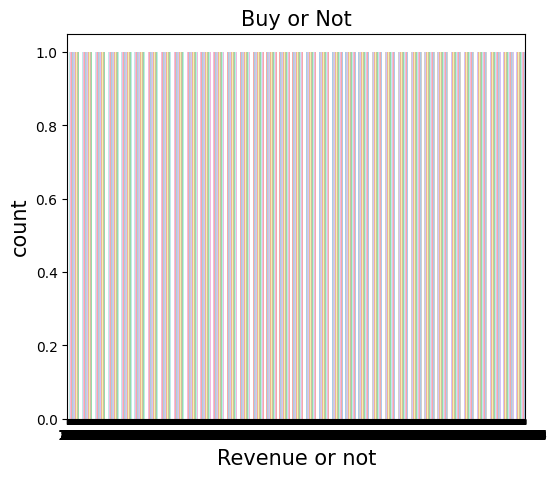

In [11]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(1, 2, 1)
sns.countplot(data['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

## Weekend

In [12]:
data['Weekend'].value_counts()

Weekend
False    9462
True     2868
Name: count, dtype: int64

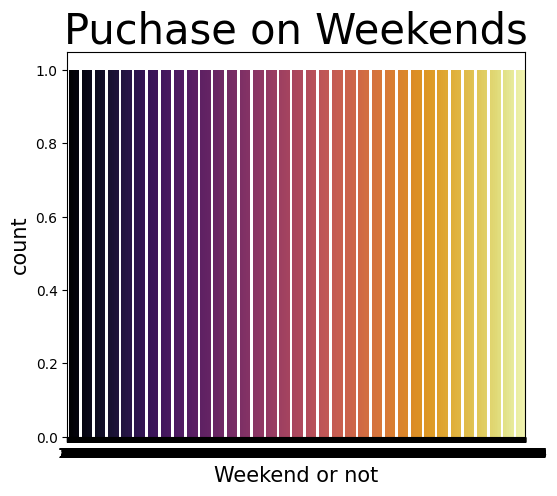

In [13]:
# checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (13,5)
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Puchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

## Operating Systems

In [14]:

data['OperatingSystems'].value_counts()

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

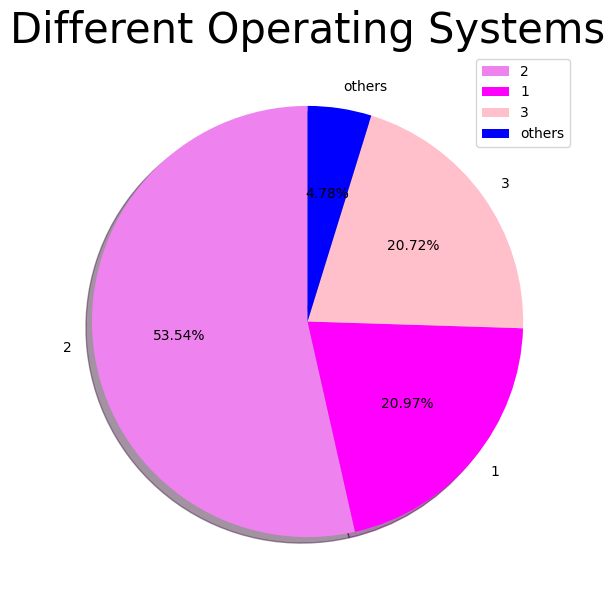

In [15]:
# plotting a pie chart for Operating Systems

plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['violet', 'magenta', 'pink', 'blue']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Different Operating Systems', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()




## Browsers

In [16]:

data['Browser'].value_counts()

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

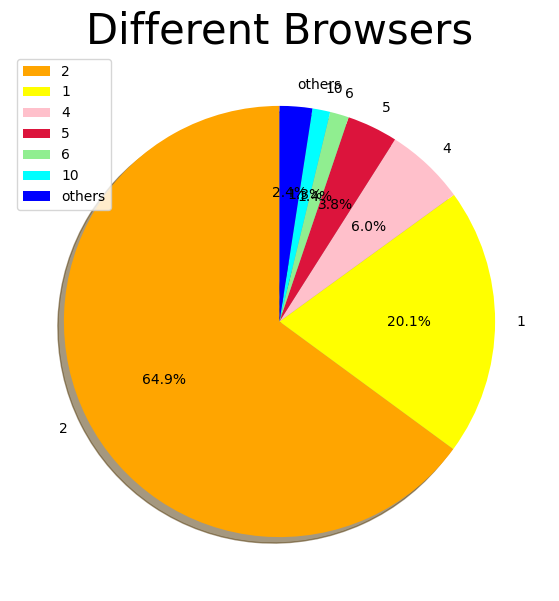

In [17]:
# Ploting a pie chart for operating systems
plt.rcParams['figure.figsize'] = (18, 7)

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1", "4", "5", "6", "10", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.1f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

## Month

In [18]:
data['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

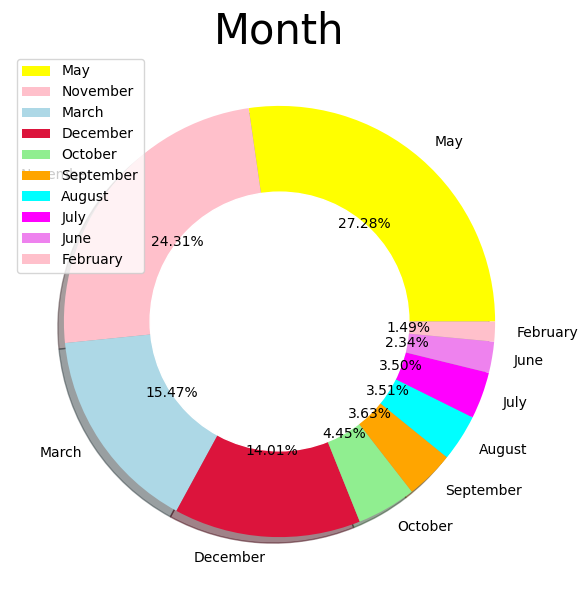

In [19]:
# creating a donut chart for the months variations
# plotting a pie chart for share of special days
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

## Visitor Type

In [20]:
data['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

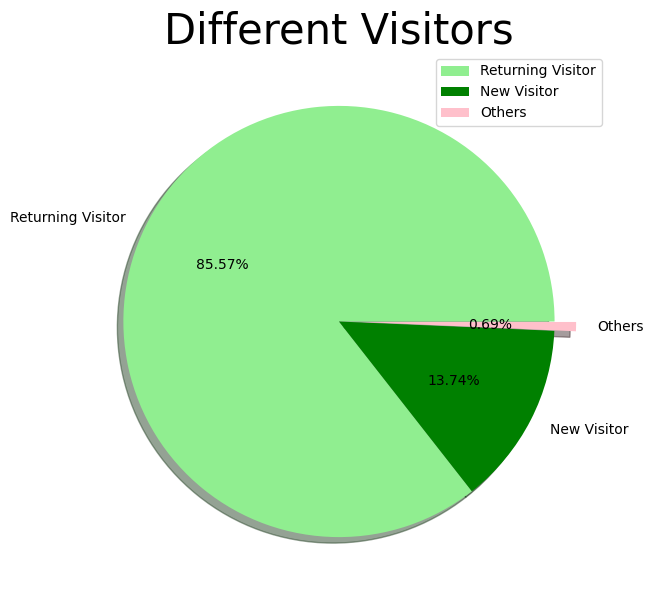

In [21]:
# plotting a pie chart for Visitors

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

### Traffic Type

In [22]:
data['TrafficType'].value_counts()

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64

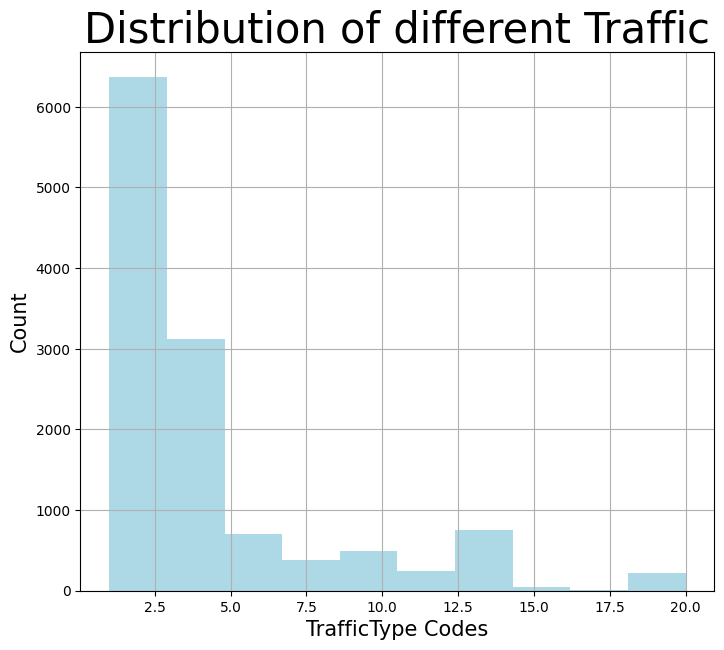

In [23]:
# visualizing the distribution of different traffic around the TrafficType
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['TrafficType'], color = 'lightblue')
plt.title('Distribution of different Traffic', fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.grid()
plt.show()

## Region

In [24]:
data['Region'].value_counts()

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

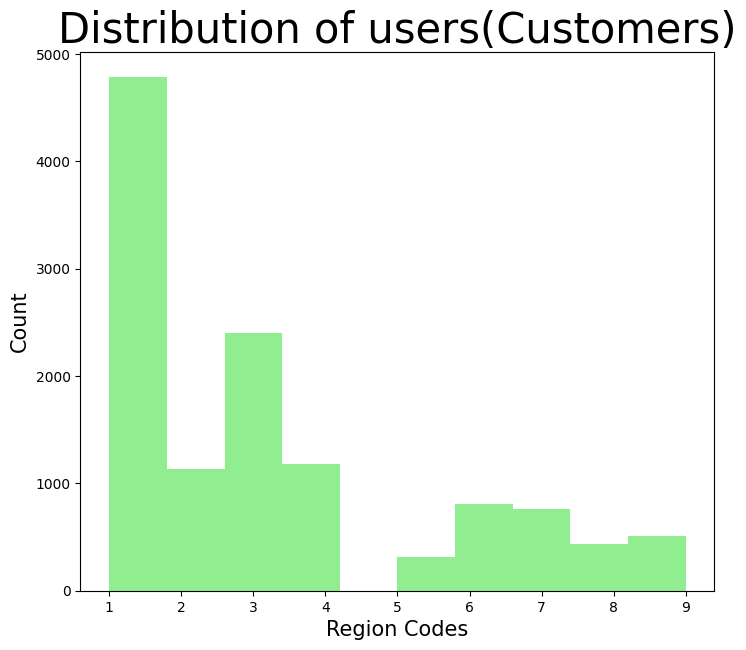

In [25]:
# visualizing the distribution of the users around the Region
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['Region'], color = 'lightgreen')
plt.title('Distribution of users(Customers)', fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [26]:
data['SpecialDay'].value_counts()

SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

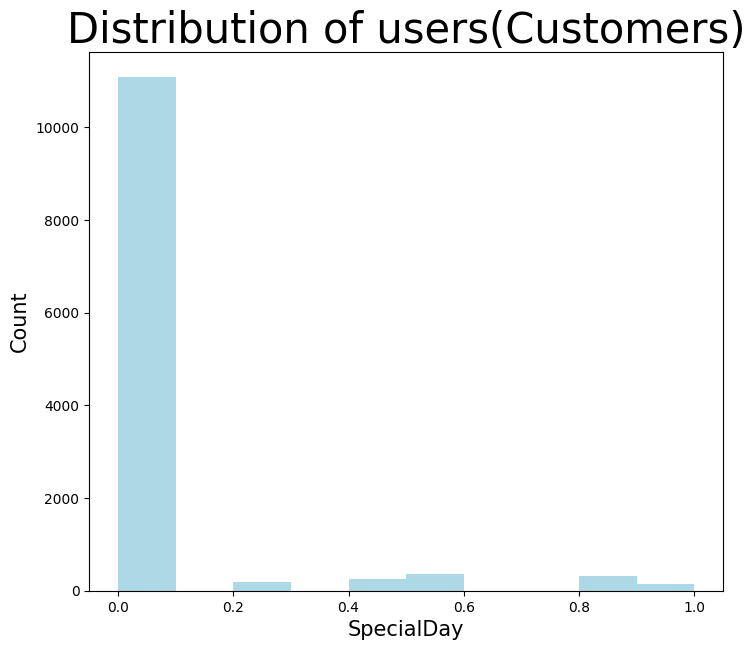

In [27]:
# visualizing the distribution of the users around the SpecialDay
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['SpecialDay'], color = 'lightblue')
plt.title('Distribution of users(Customers)', fontsize = 30)
plt.xlabel('SpecialDay', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

### Administrative duration vs Revenue

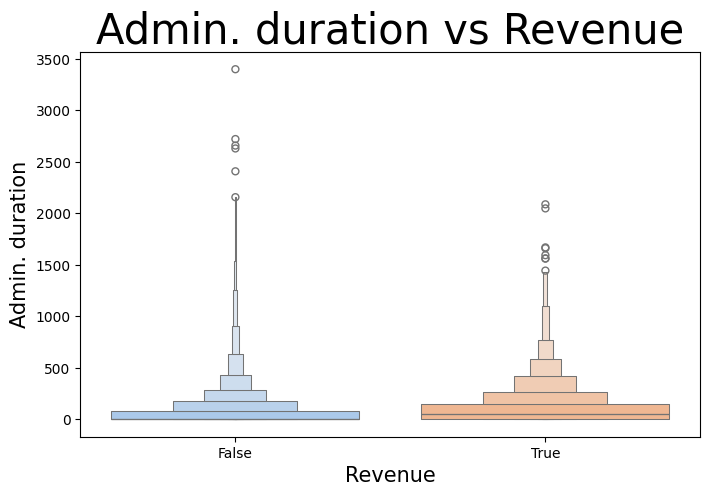

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['Revenue'], y=data['Administrative_Duration'], palette='pastel')
plt.title('Admin. duration vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Admin. duration', fontsize=15)
plt.show()


## Informational duration vs Revenue

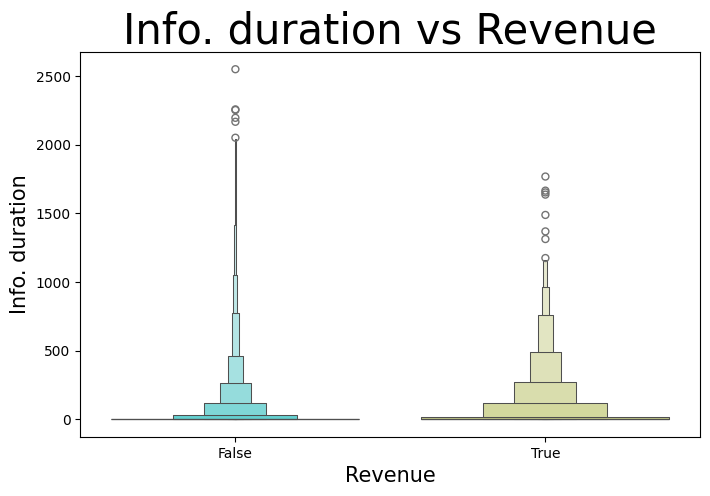

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['Revenue'], y=data['Informational_Duration'], palette='rainbow')
plt.title('Info. duration vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Info. duration', fontsize=15)

plt.show()


## Product Related Duration vs Revenue

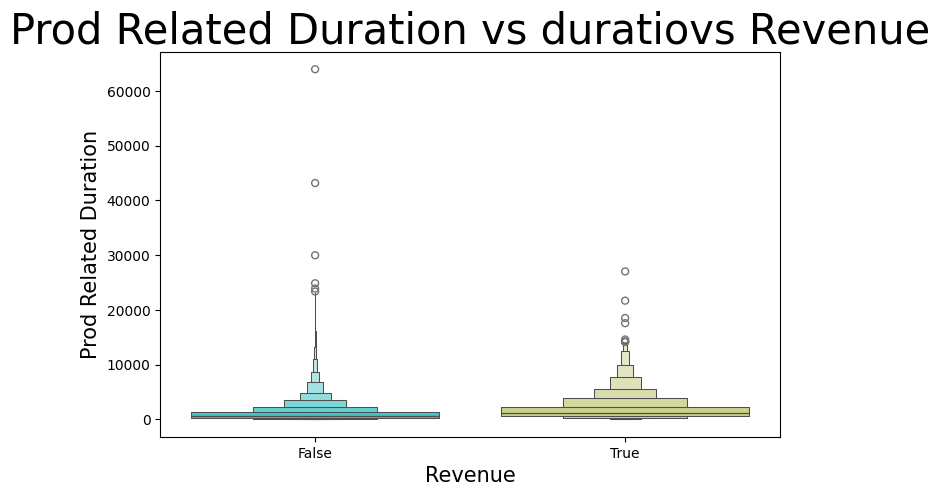

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['Revenue'], y=data['ProductRelated_Duration'], palette='rainbow')
plt.title('Prod Related Duration vs duratiovs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Prod Related Duration', fontsize=15)

plt.show()


## Exit Rates vs Revenue

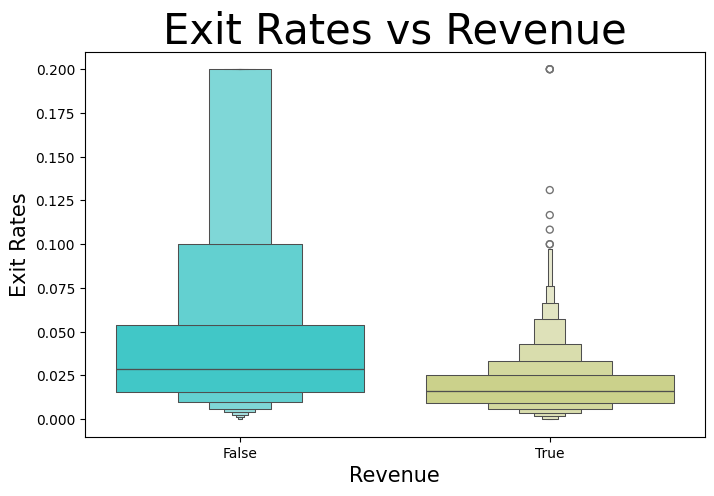

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['Revenue'], y=data['ExitRates'], palette='rainbow')
plt.title('Exit Rates vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Exit Rates', fontsize=15)

plt.show()


## Page Values vs Revenue

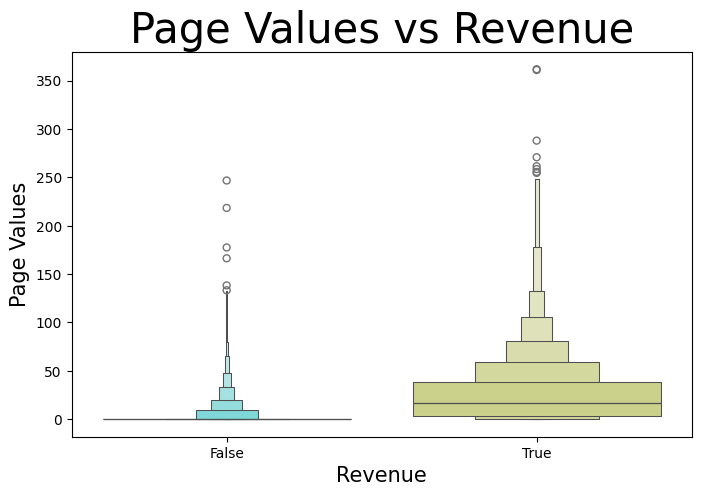

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['Revenue'], y=data['PageValues'], palette='rainbow')
plt.title('Page Values vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Page Values', fontsize=15)

plt.show()


## Bounce Rates vs Revenue

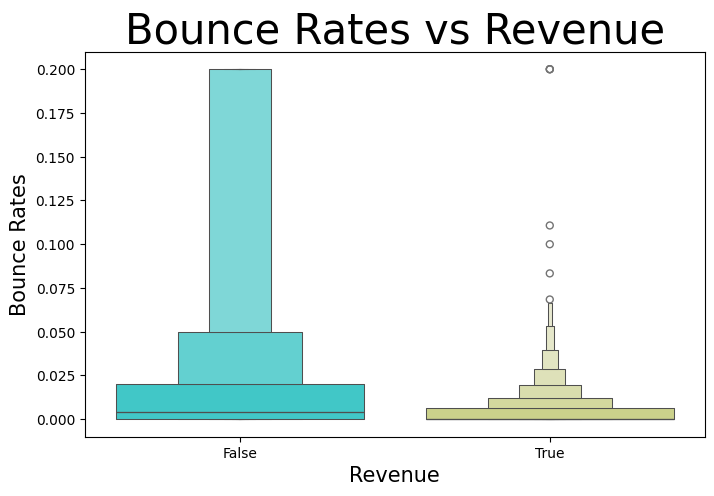

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['Revenue'], y=data['BounceRates'], palette='rainbow')
plt.title('Bounce Rates vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Bounce Rates', fontsize=15)

plt.show()


## Weekend vs Revenue

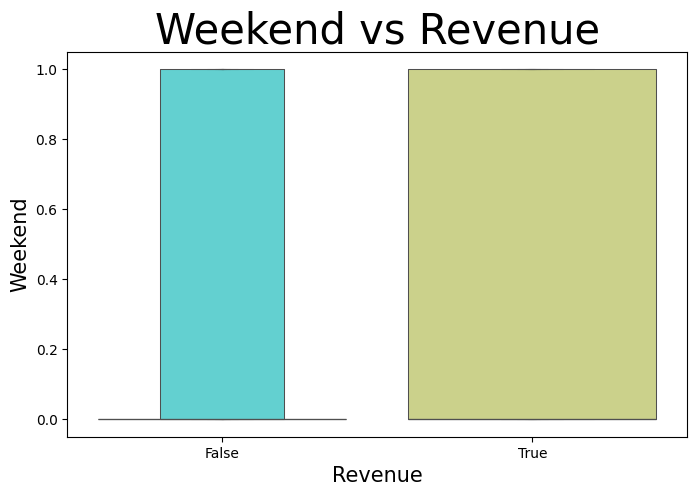

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['Revenue'], y=data['Weekend'], palette='rainbow')
plt.title('Weekend vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Weekend', fontsize=15)

plt.show()


## Traffic Type vs Revenue

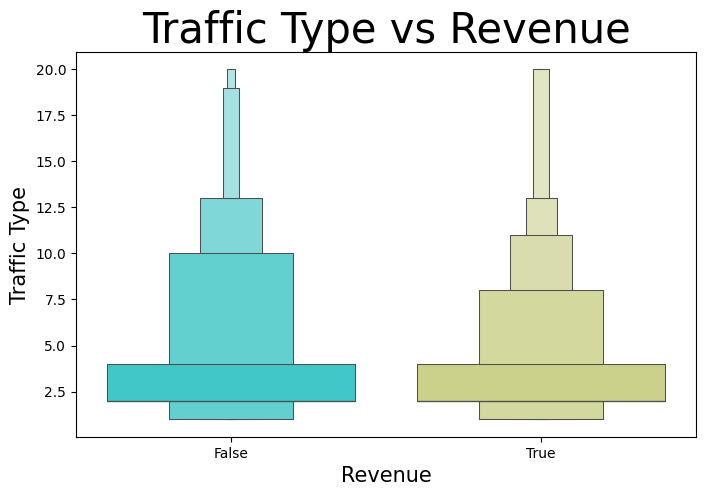

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['Revenue'], y=data['TrafficType'], palette='rainbow')
plt.title('Traffic Type vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Traffic Type', fontsize=15)

plt.show()


## Visitor type vs revenue

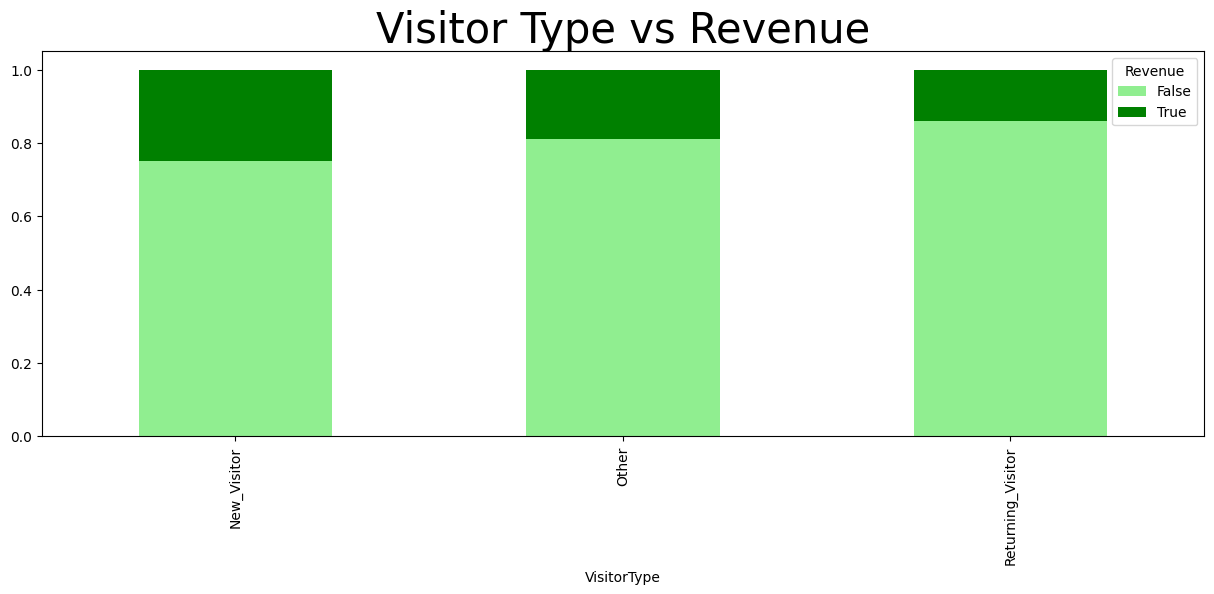

In [36]:
# bar plot for visitor type vs revenue
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize =(15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

## Region vs Revenue

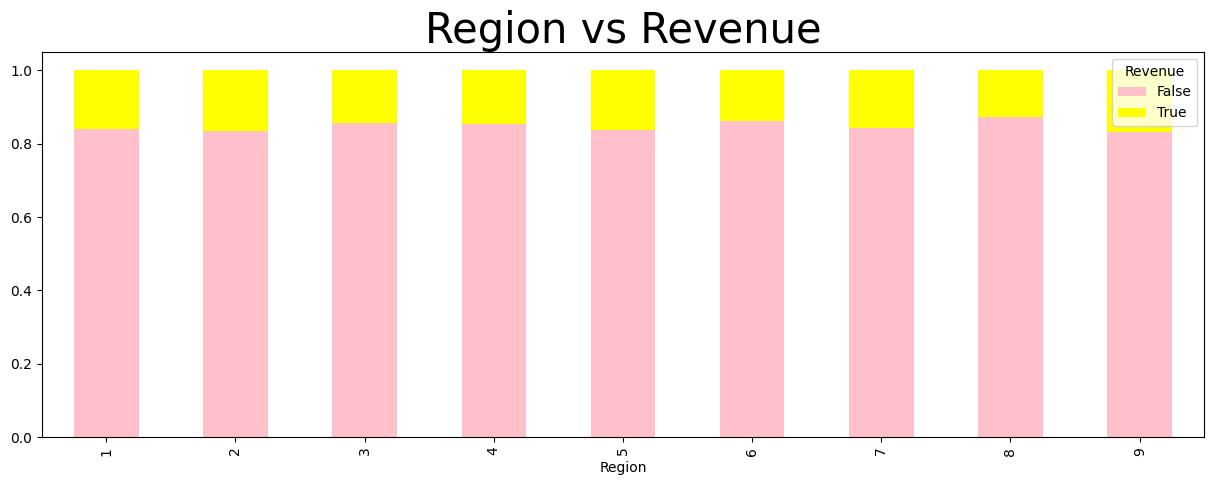

In [37]:
# bar plot for region vs revenue

df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['pink', 'yellow'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

### month vs pagevalues w.r.t. revenue

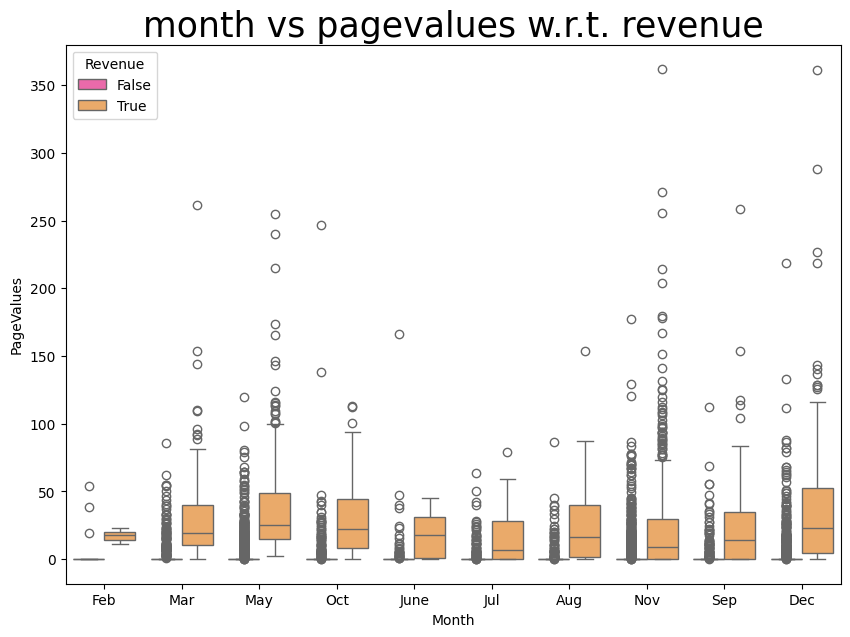

In [38]:
# boxplot for month vs pagevalues w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'spring')
plt.title('month vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()

### month vs exitrates w.r.t. revenue

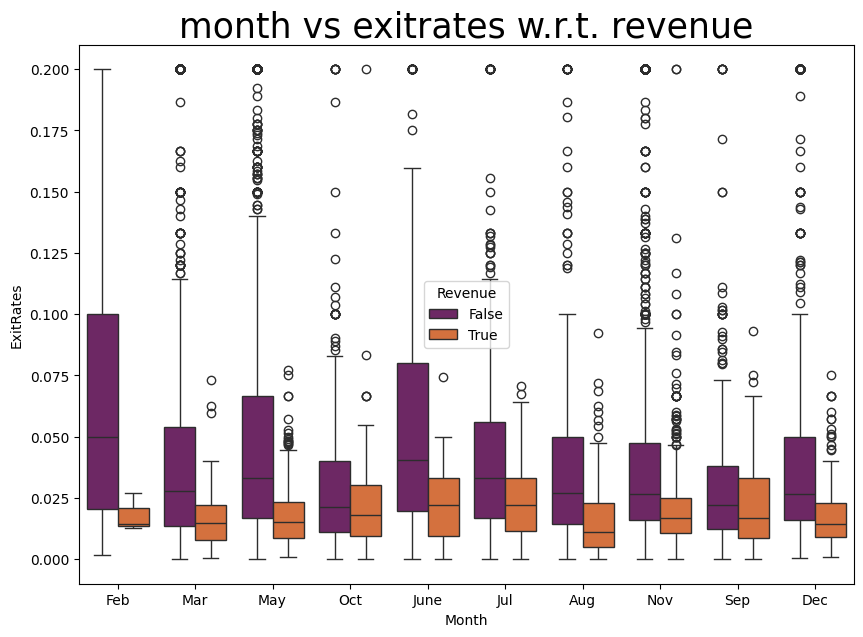

In [39]:
# boxplot for month vs exitrates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'inferno')
plt.title('month vs exitrates w.r.t. revenue', fontsize = 25)
plt.show()

### month vs bounceRates w.r.t. Revenue

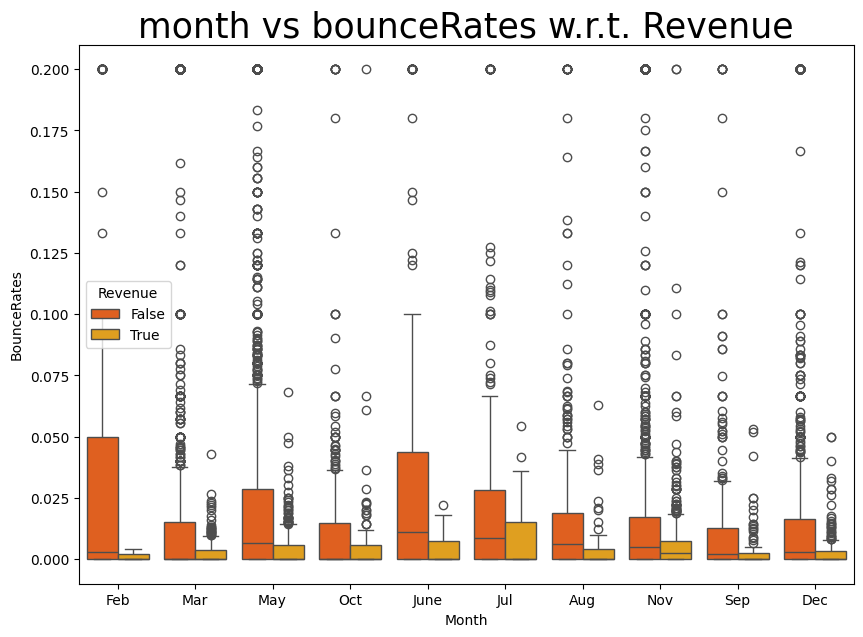

In [40]:
# boxplot for month vs bounceRates w.r.t. Revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'autumn')
plt.title("month vs bounceRates w.r.t. Revenue", fontsize = 25)
plt.show()

## VisitorType vs BounceRates w.r.t. revenue

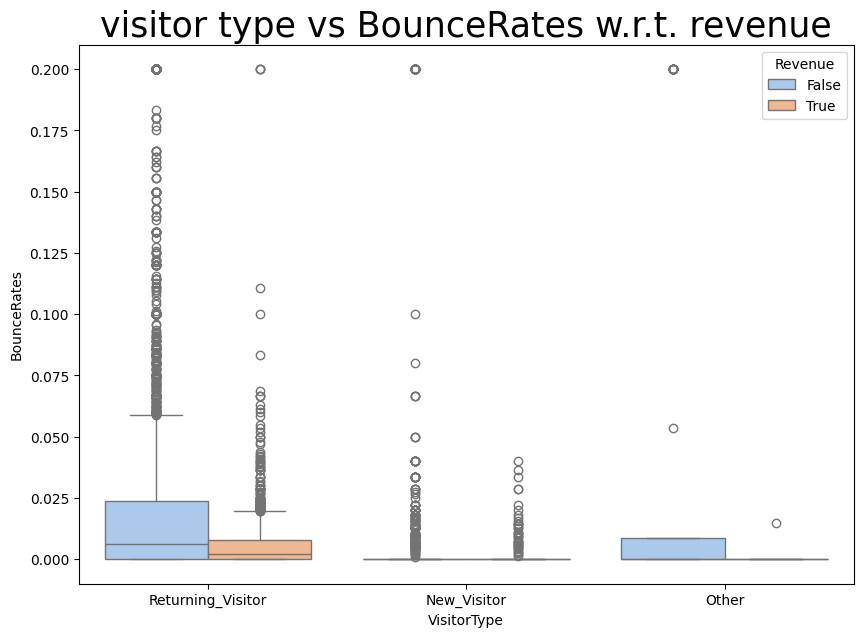

In [41]:
# boxplot for visitorType vs BounceRates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('visitor type vs BounceRates w.r.t. revenue', fontsize = 25)
plt.show()

## visitor type vs exit rates w.r.t. revenue

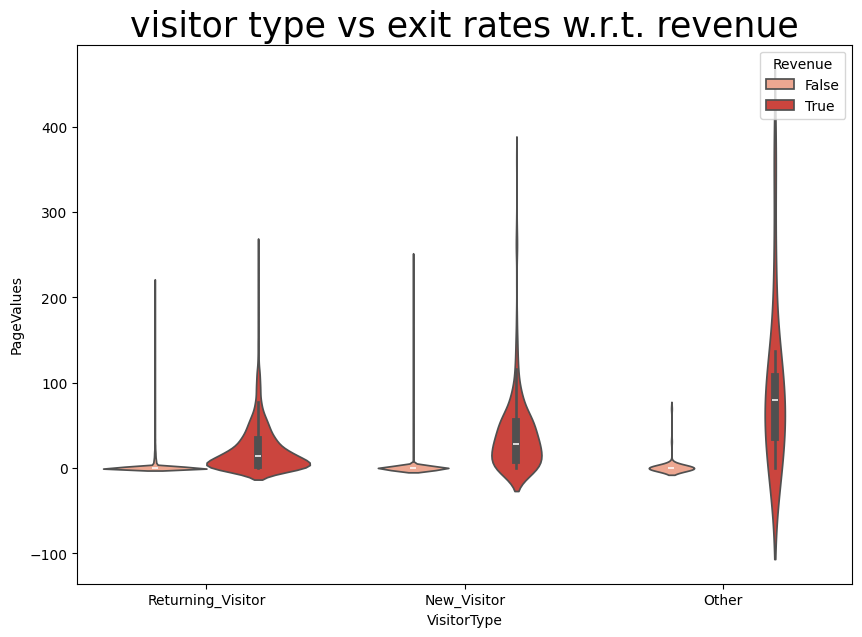

In [42]:
# violin plot for visitor type vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'Reds')
plt.title('visitor type vs exit rates w.r.t. revenue', fontsize = 25)
plt.show()

## visitor type vs exit rates w.r.t. revenue

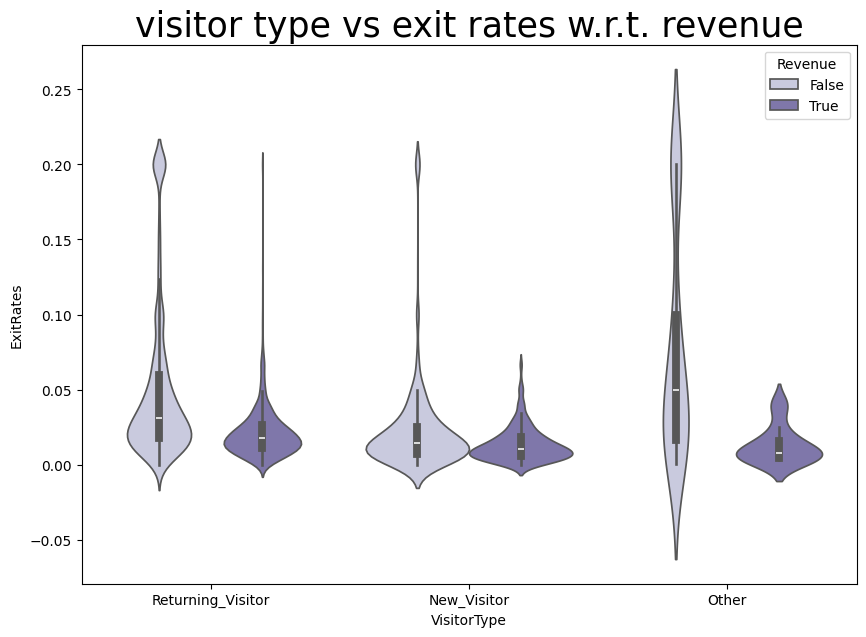

In [43]:
# violin plot for visitor type vs exit rates wrt revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Purples')
plt.title('visitor type vs exit rates w.r.t. revenue', fontsize = 25)
plt.show()

## region vs pagevalues w.r.t. revenue

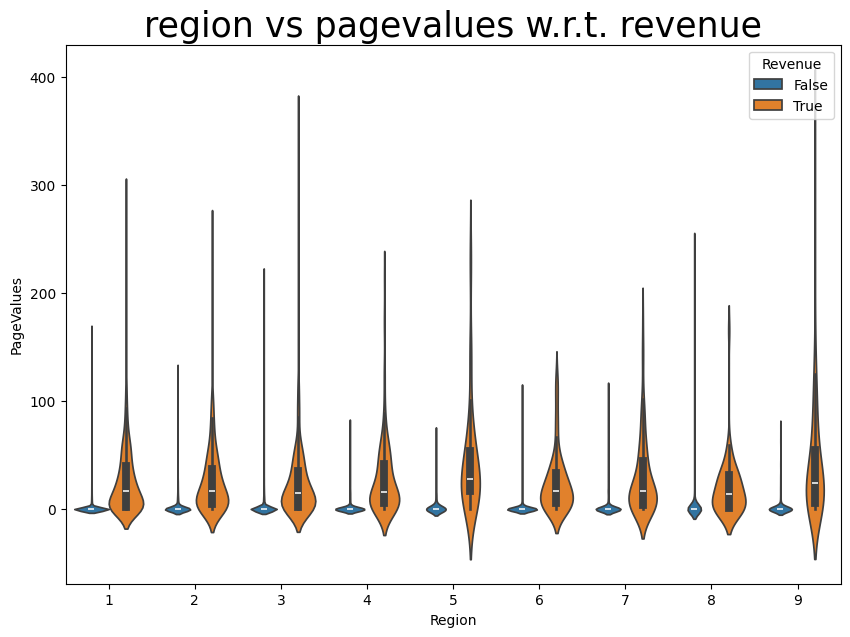

In [44]:
# violin plot for region vs pagevalues w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data ['Region'], y = data['PageValues'], hue = data['Revenue'])
plt.title('region vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()


## rigion vs exit rates w.r.t revenue

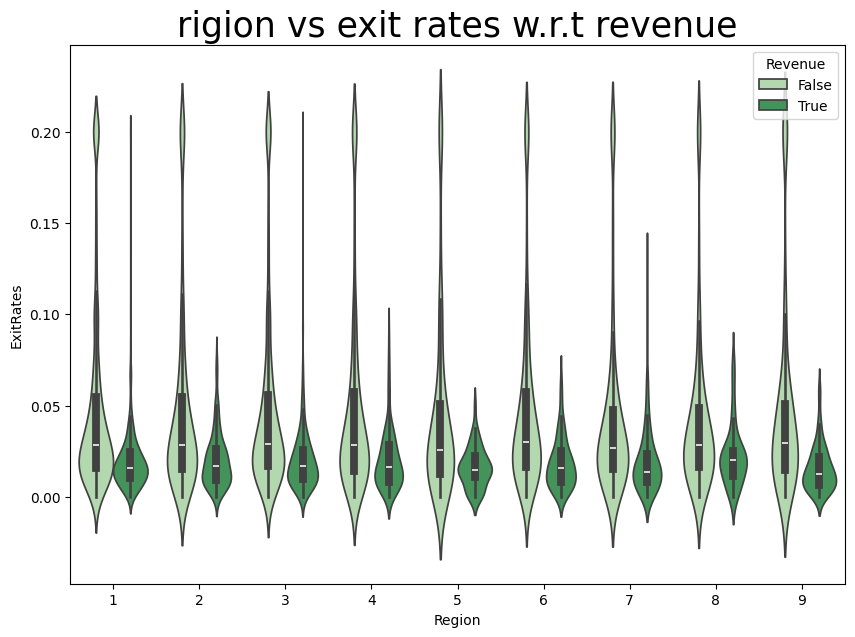

In [45]:
# violin plot for rigion vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.violinplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Greens')
plt.title("rigion vs exit rates w.r.t revenue", fontsize = 25)
plt.show()

### Summary table of multivariate Feature Analysis

In [46]:
multivariate_feature_analysis = [
    ['month vs pagevalues', 'Revenue', 'Gaussian', 'High', 'Low', 'Low', 'High'],
    ['month vs exitrates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'Medium'],
    ['month vs bounceRates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'High'],
    ['visitor type vs BounceRates' , 'Revenue', 'Exponential', 'Low', 'High', 'Low', 'High'],
    ['visitor type vs exit rates' , 'Revenue', 'Exponential', 'Low', 'High', 'High', 'Medium'],
    ['visitor type vs exit rates', 'Revenue', 'Exponential', 'High', 'Low', 'High', 'Medium'],
    ['region vs pagevalues', 'Revenue', 'Exponential', 'Low', 'High', 'High', 'High'],
    ['rigion vs exit rates', 'Revenue', 'Gaussian', 'High', 'High', 'High', 'Medium']
]
feature_summary = pd.DataFrame(multivariate_feature_analysis, columns=['Multivariate_features', 'W.R.T', 'Distribution', 'Revenue_True', 'Revenue_False', 'Outliers', 'Importance'])
feature_summary

,Multivariate_features,W.R.T,Distribution,Revenue_True,Revenue_False,Outliers,Importance
0,month vs pagevalues,Revenue,Gaussian,High,Low,Low,High
1,month vs exitrates,Revenue,Gaussian,Low,High,Medium,Medium
2,month vs bounceRates,Revenue,Gaussian,Low,High,Medium,High
3,visitor type vs BounceRates,Revenue,Exponential,Low,High,Low,High
4,visitor type vs exit rates,Revenue,Exponential,Low,High,High,Medium
5,visitor type vs exit rates,Revenue,Exponential,High,Low,High,Medium
6,region vs pagevalues,Revenue,Exponential,Low,High,High,High
7,rigion vs exit rates,Revenue,Gaussian,High,High,High,Medium


### categorical column vs target column

In [47]:
cat_cols=['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']

In [48]:
# check wheather Revenue is influenced by categorical column
# Null Hypopthesis, H0 = proportion of revenue accross the category is same
# Alternative Hypothesis, H1 = proportion of revenue at least in two category is different
scol = []
spval = []
ss = []
for n in cat_cols:
    scol.append(n)
    cp = chi2_contingency(pd.crosstab(data[n], data['Revenue']))[1]
    spval.append(round(cp, 4))
    if cp < 0.05:
        # rejects Null Hypothesis
        ss.append('*') # significant
    else:
        # Accept Null Hypothesis
        ss.append('**') # not significant


In [49]:
pd.DataFrame({'Feature': scol, 'P-Value': spval, 'Significance': ss})

,Feature,P-Value,Significance
0,Administrative,0.0000,*
1,Informational,0.0000,*
2,ProductRelated,0.0000,*
3,Month,0.0000,*
4,OperatingSystems,0.0000,*
5,Browser,0.0061,*
6,Region,0.3214,**
7,TrafficType,0.0000,*
8,VisitorType,0.0000,*
9,Weekend,0.0013,*


### Numerical Column vs Target

In [50]:
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']

In [51]:
from scipy.stats import levene


tcol = []
tpval = []
ts = []
for n in numerical_columns:
    tcol.append(n)
    # splitting into 2 groups(Revenue = True, Revenue = False)
    g1 = data[n][data['Revenue'] == False]
    g2 = data[n][data['Revenue'] == True]
    # Test for normality(Shapiro Test)
    # H0: Data is normal
    # H1: Data is not normal
    # if p < 0.05 --- reject Null Hypothesis
    for b in [g1]:
        s, p = shapiro(b)
    for c in [g2]:
        s1, p1 = shapiro(c)
    if p > 0.05 or p1 > 0.05:
        w, lp = levene(g1, g2)
    # If doesn't pass normality or variance test, we do non-parametric Test(mannwhitneyu Test)
    if p <= 0.05 or p1 <= 0.05 or lp <= 0.05:
        ms, mp = mannwhitneyu(g1, g2)
        tpval.append(round(mp, 4))
    if mp < 0.05:
        ts.append('*')  # significant
    else:
        ts.append('**') # not significant


In [52]:
pd.DataFrame({'Feature': tcol, 'P-Value': tpval, 'Significance': ts})

,Feature,P-Value,Significance
0,Administrative_Duration,0.0,*
1,Informational_Duration,0.0,*
2,ProductRelated_Duration,0.0,*
3,BounceRates,0.0,*
4,ExitRates,0.0,*
5,PageValues,0.0,*


## Outliers

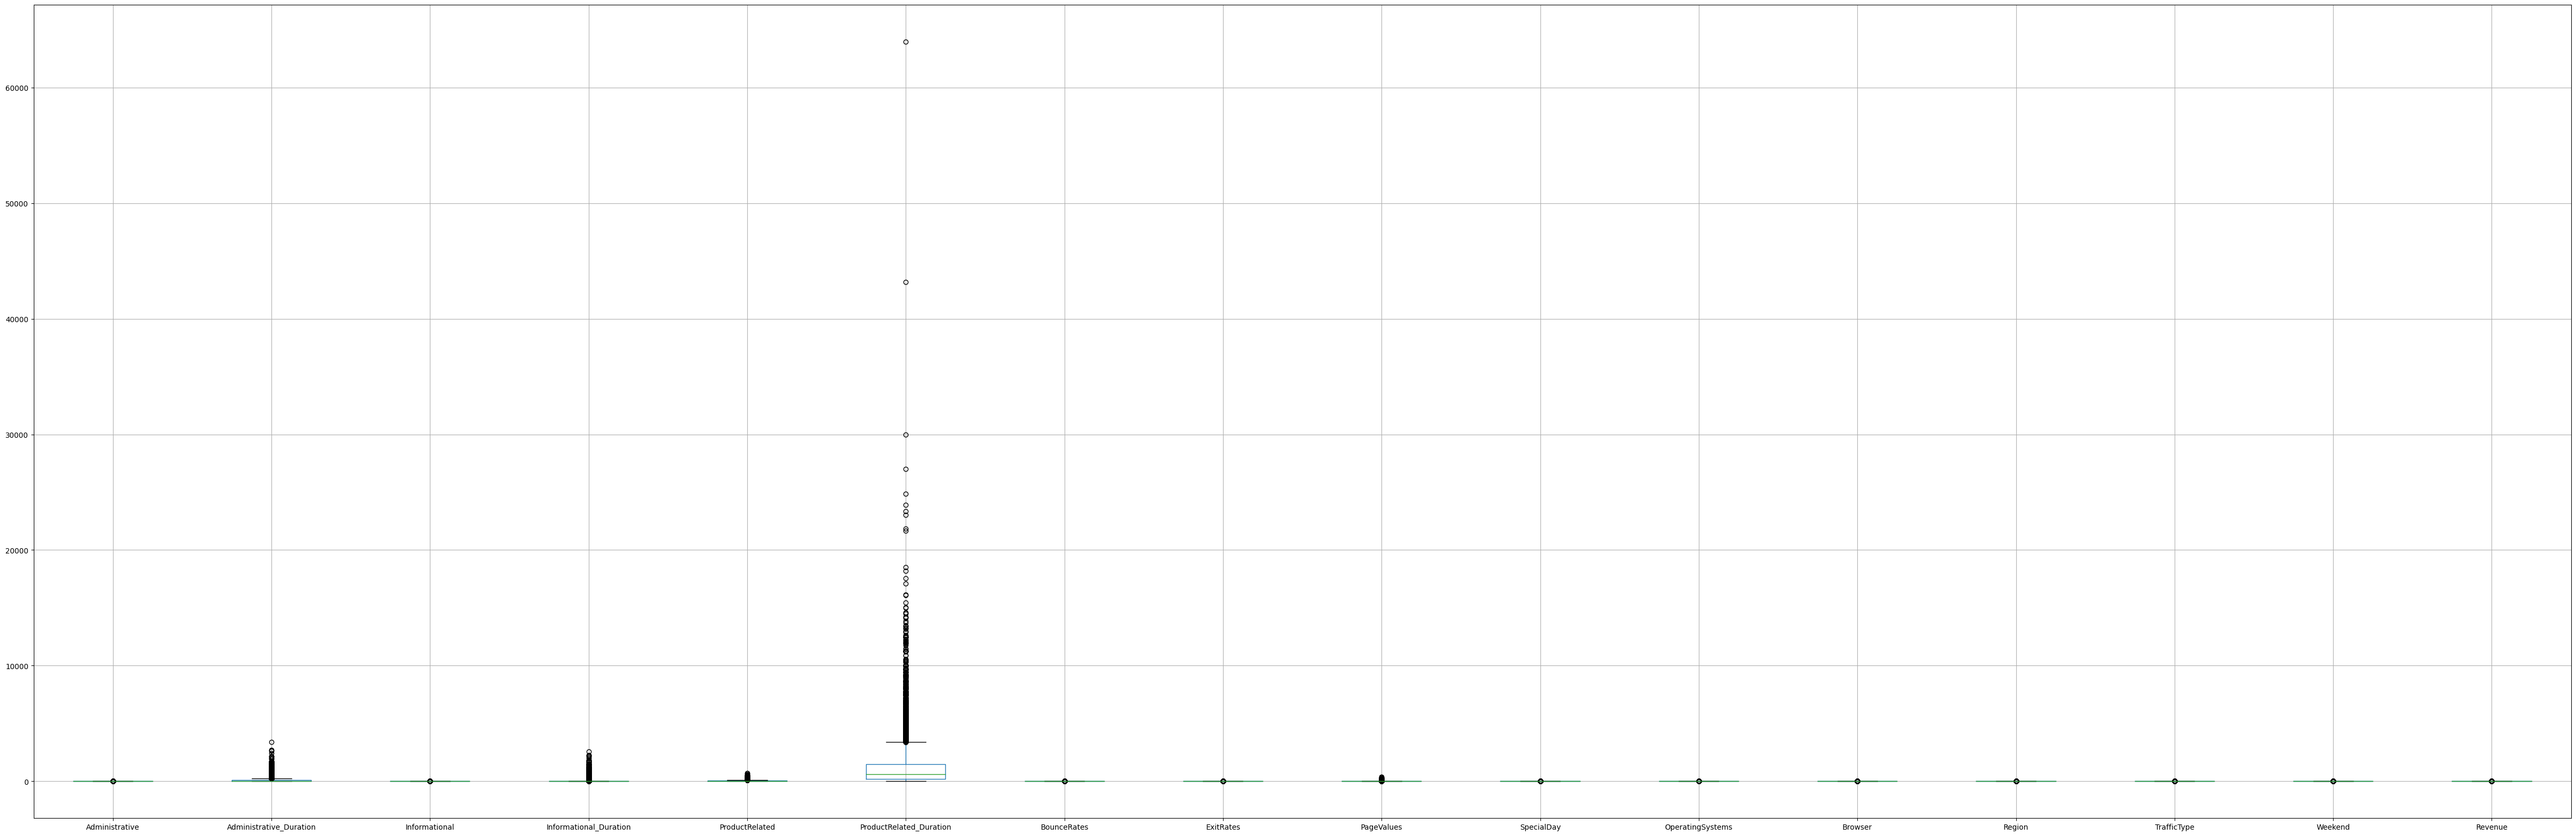

In [53]:
plt.figure(figsize=(62, 20))
data.boxplot();

In [54]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in numerical_columns:
    data_mean, data_std = mean(data[i]), std(data[i])

    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i, ': \n')

    # identify outliers
    outliers = [x for x in data[i] if x < lower or x > upper]

    num_out = len(outliers)
    print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in data[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)

Administrative_Duration : 

Identified outliers: 232
Non-outlier observations: 12098
Percent of outliers: 1.8815896188158963 

Informational_Duration : 

Identified outliers: 230
Non-outlier observations: 12100
Percent of outliers: 1.8653690186536902 

ProductRelated_Duration : 

Identified outliers: 219
Non-outlier observations: 12111
Percent of outliers: 1.7761557177615572 

BounceRates : 

Identified outliers: 708
Non-outlier observations: 11622
Percent of outliers: 5.742092457420925 

ExitRates : 

Identified outliers: 713
Non-outlier observations: 11617
Percent of outliers: 5.78264395782644 

PageValues : 

Identified outliers: 259
Non-outlier observations: 12071
Percent of outliers: 2.1005677210056772 



# Visualization of Outliers

In [55]:
Outliers = pd.DataFrame({'Feature': numerical_columns, '% Of Outliers': out_per})
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending = False)
outlier_sorted

,Feature,% Of Outliers
4,ExitRates,5.782644
3,BounceRates,5.742092
5,PageValues,2.100568
0,Administrative_Duration,1.881590
1,Informational_Duration,1.865369
2,ProductRelated_Duration,1.776156


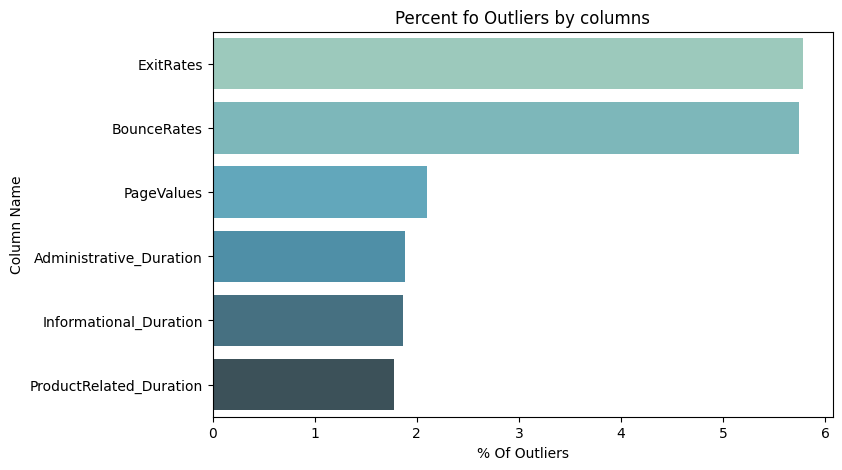

In [56]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'], palette = 'GnBu_d')
plt.title('Percent fo Outliers by columns')
plt.ylabel('Column Name')
plt.show()

In [57]:

data.fillna(0, inplace = True)

data.isnull().sum().sum()

0

## Administrative Duration vs Bounce Rates

Shape of the dataset:  (12330, 2)


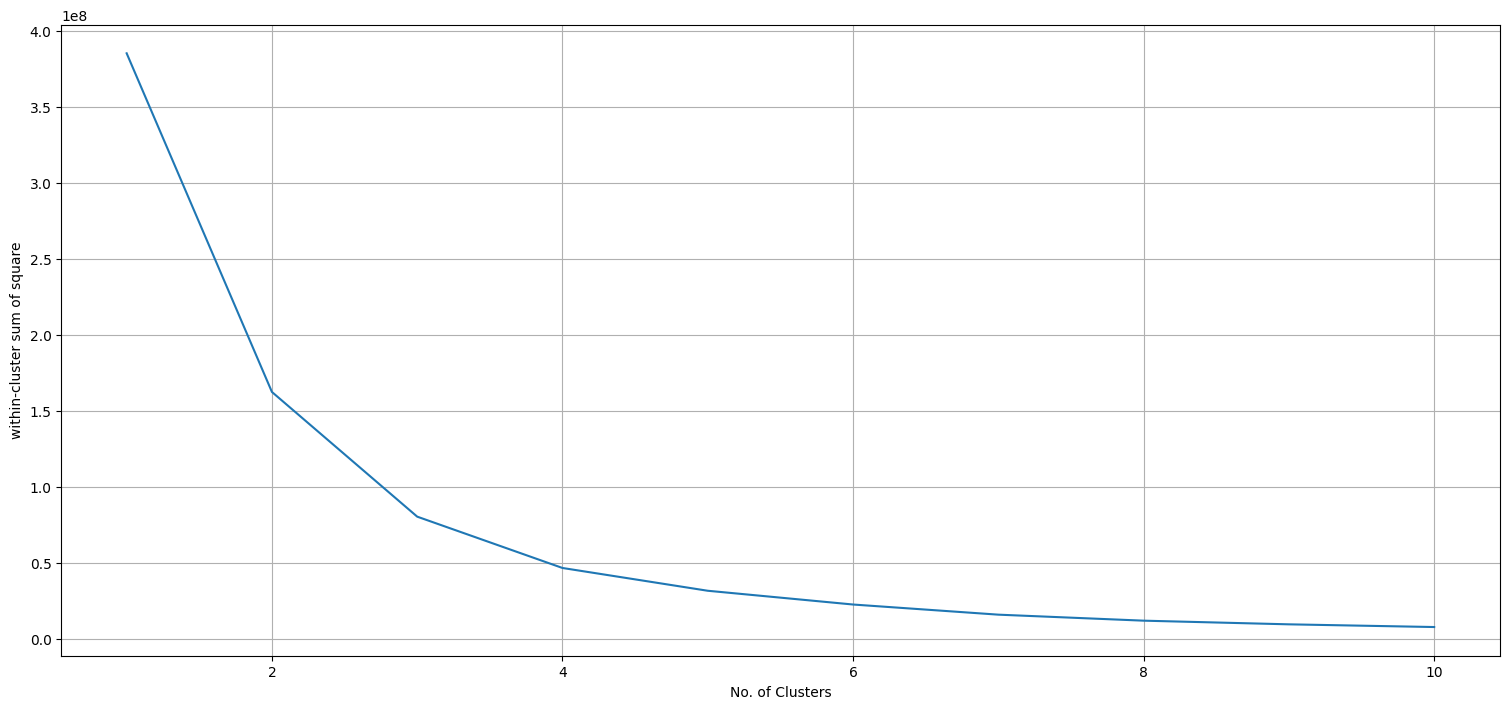

In [58]:
# Time spent by the Users on website vs Bounce Rates
# let's cluster Administrative duration and bounce Rates to different types of clusters in the dataset.

x = data.iloc[:, [1, 6]].values

# checking the shape of the dataset
print("Shape of the dataset: ", x.shape)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10,
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

### Visualizing the Cluster using scatter plot

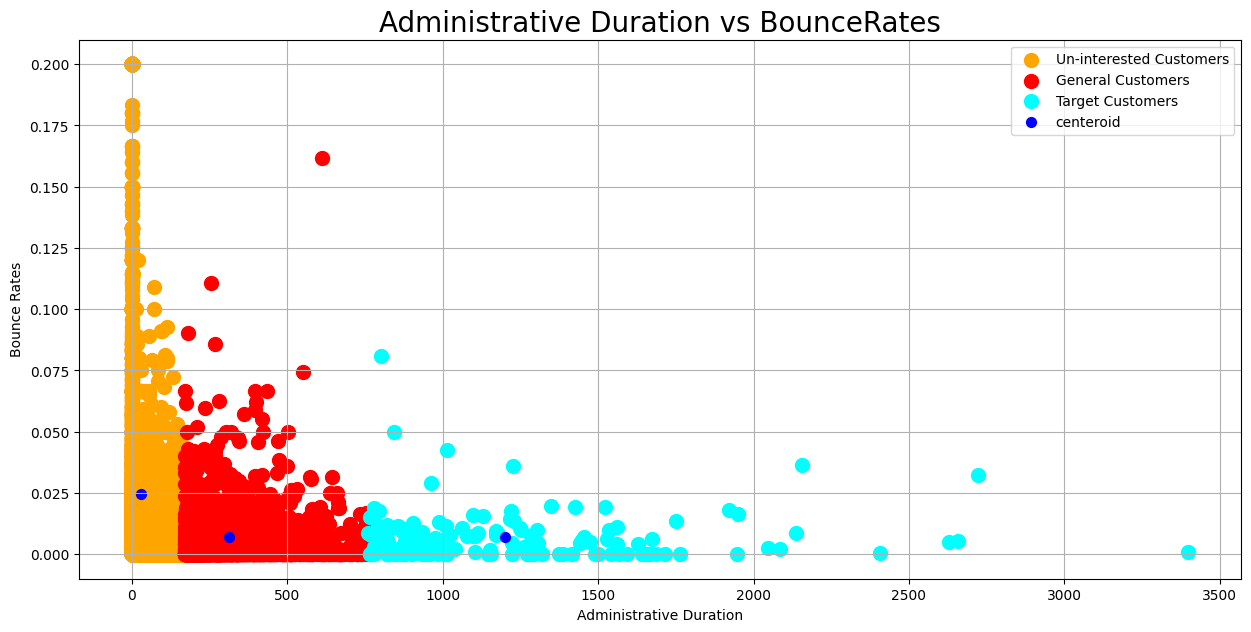

In [59]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.title('Administrative Duration vs BounceRates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

## Informational Duration vs Bounce Rates

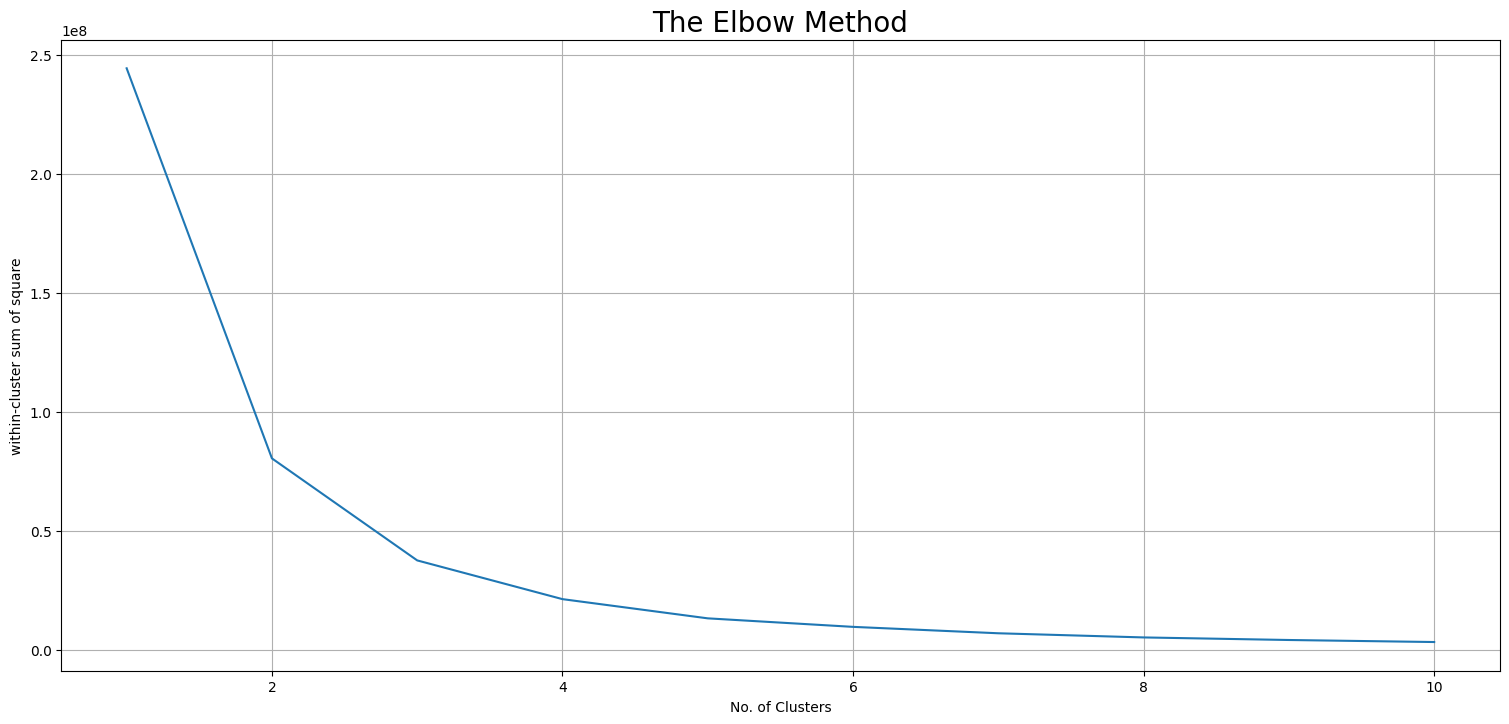

In [60]:
# cluster anaysis of Informational Duration vs Bounce Rates
x = data.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

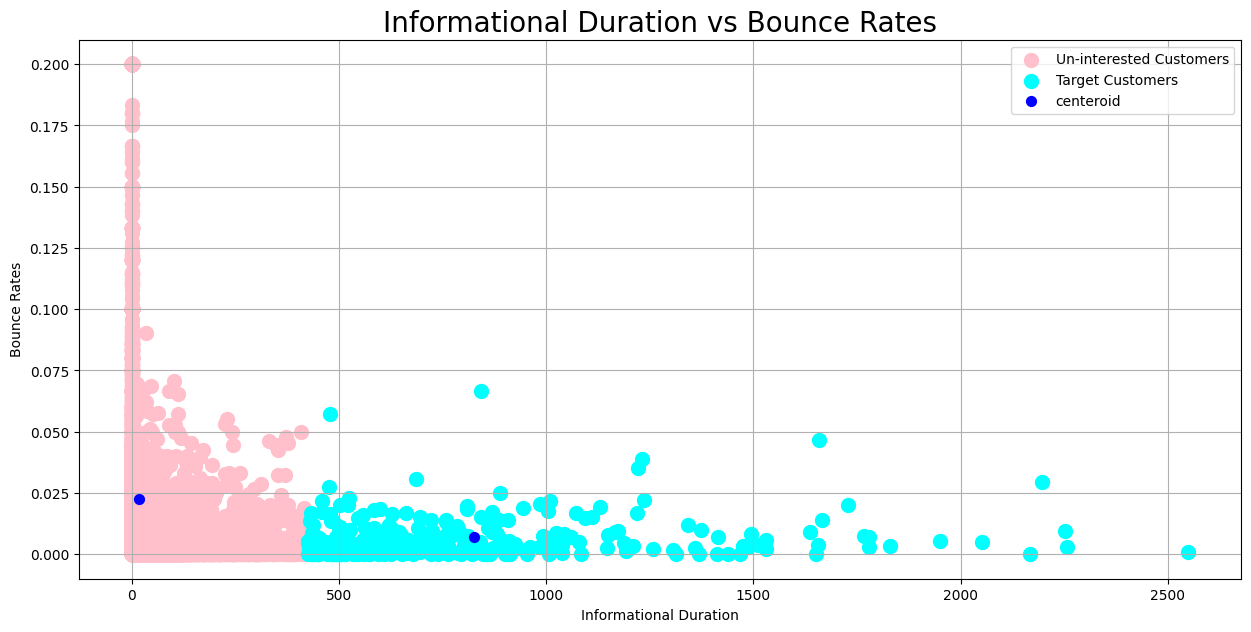

In [61]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

## Administrative Duration vs Exit Rates

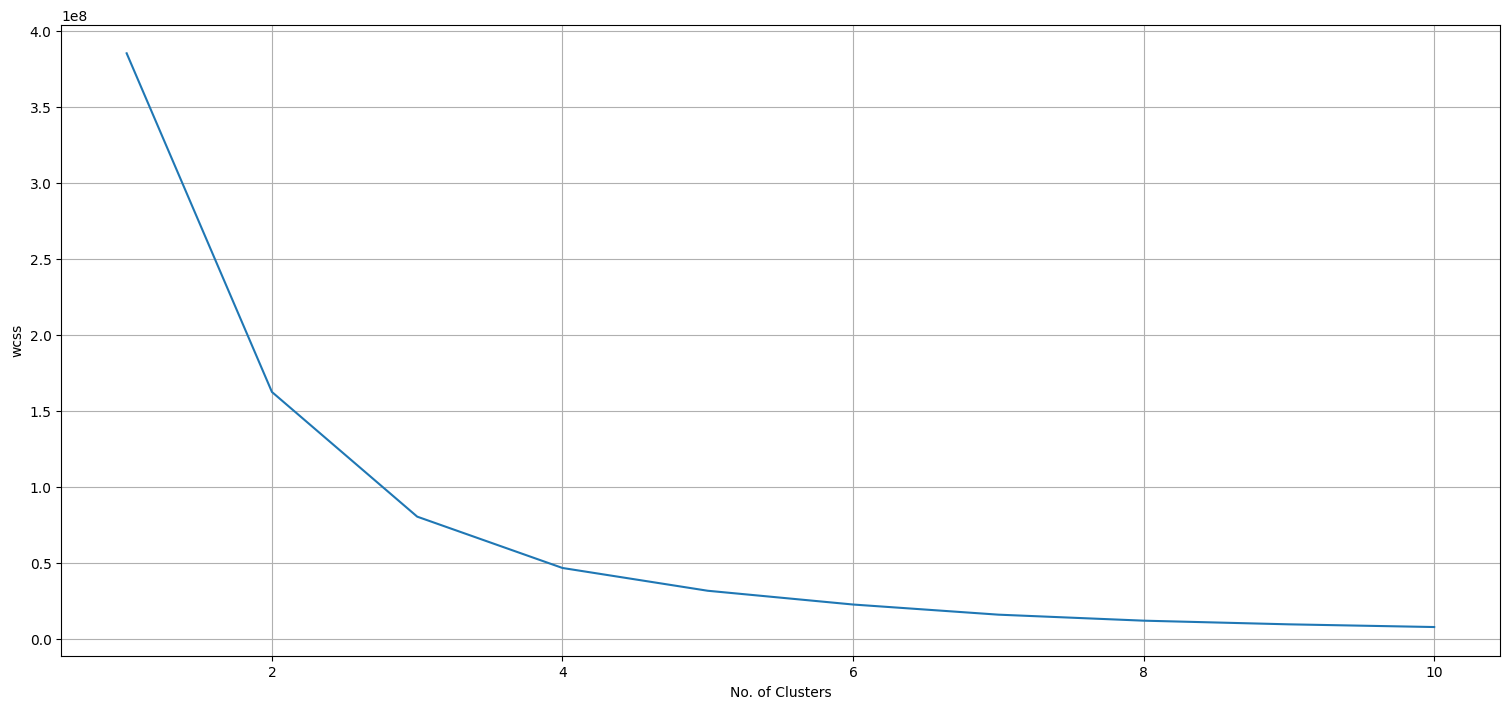

In [62]:
# informational duration vs Bounce Rates
x = data.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10,
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

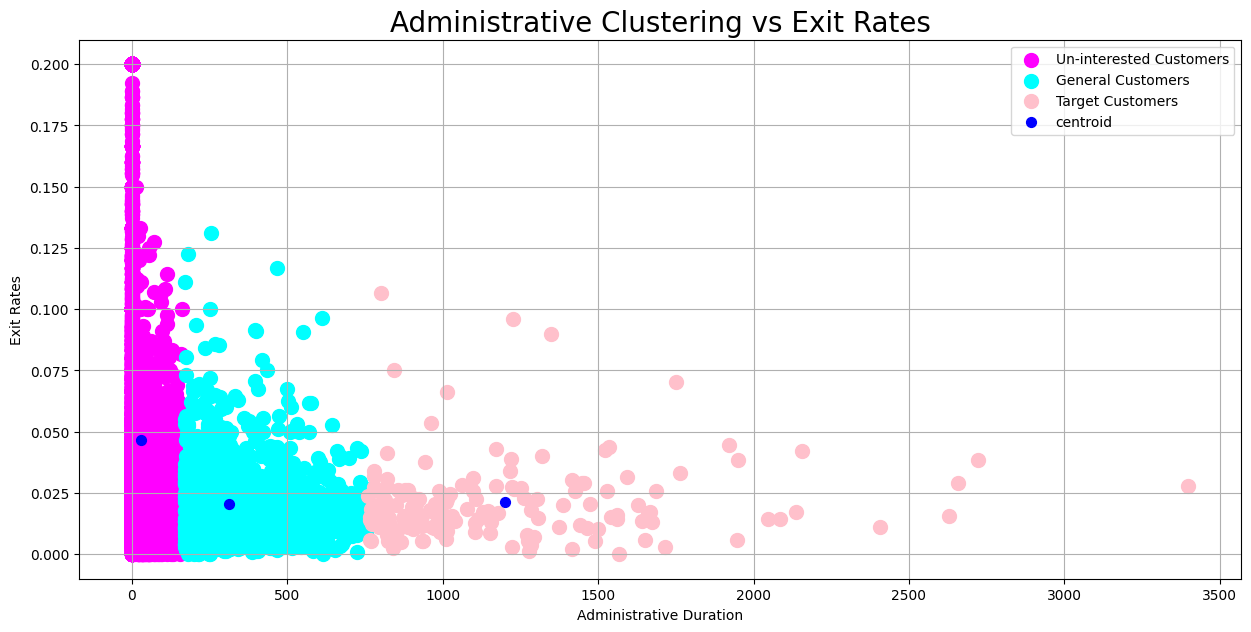

In [63]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'magenta', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

## Where from the Users of the Website come?

## Region vs Traffic Type

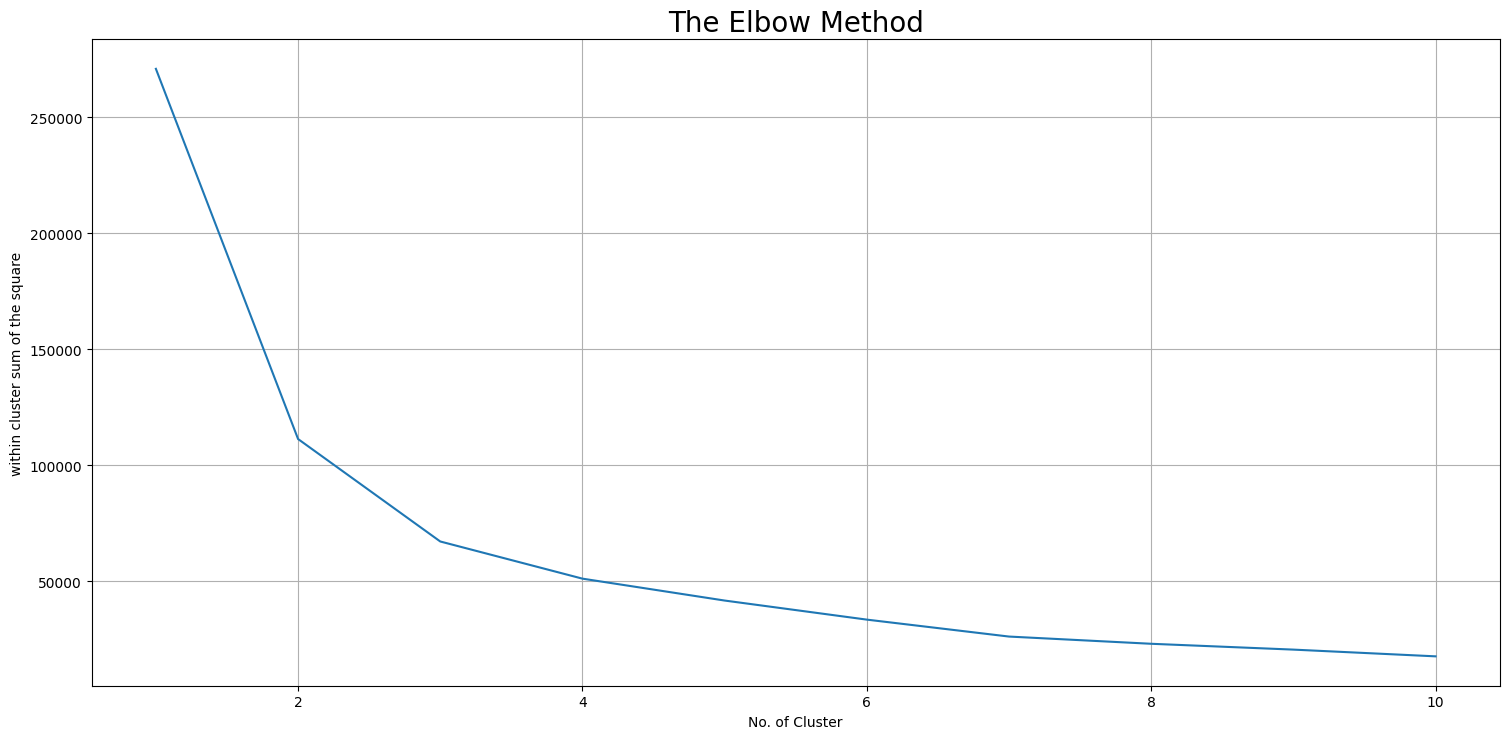

In [64]:
# Region vs TrafficType clustering
x = data.iloc[:, [13, 14]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Cluster')
plt.ylabel('within cluster sum of the square')
plt.show()

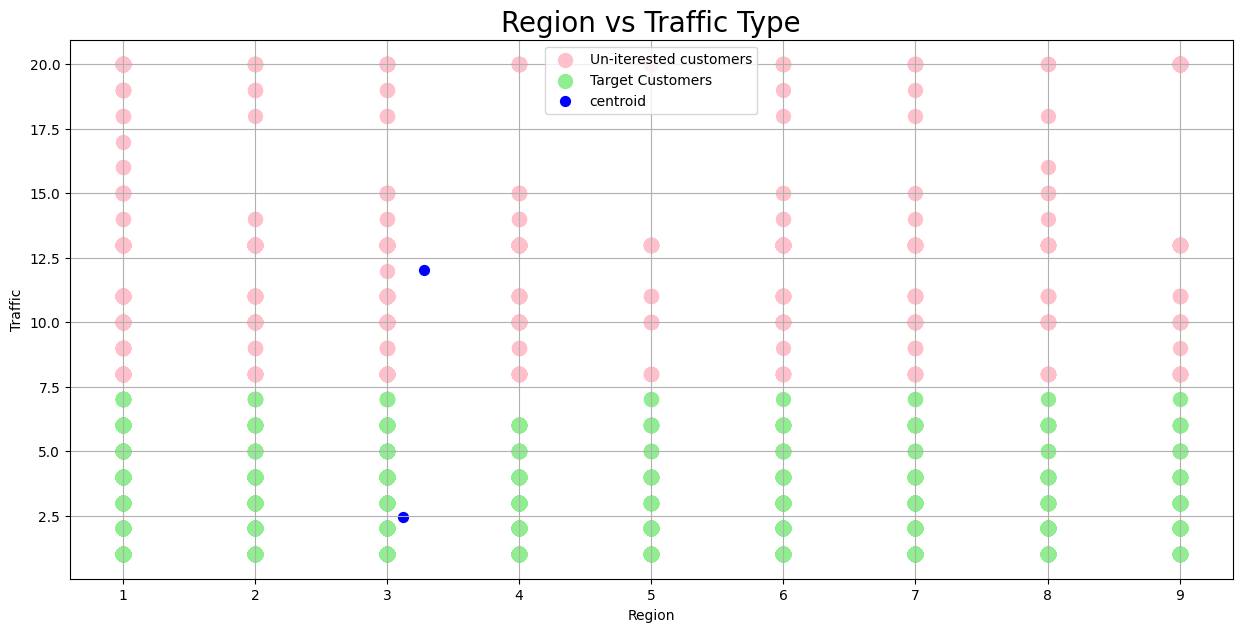

In [65]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-iterested customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'lightgreen', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centroid')

plt.title('Region vs Traffic Type', fontsize = 20)
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.grid()
plt.show()

## Adminstrative Duration vs Region

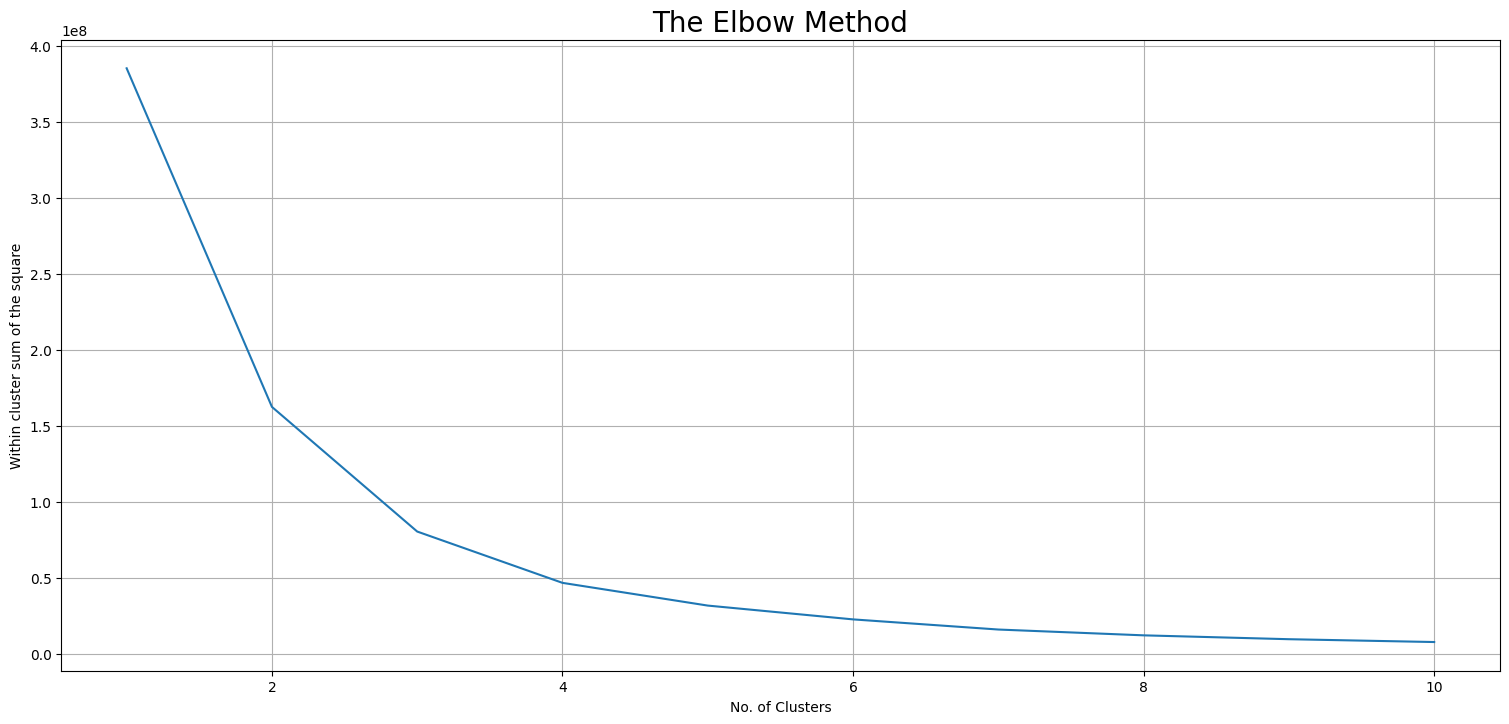

In [66]:
# administrative duration vs bounce rates
x = data.iloc[:, [1, 13]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Within cluster sum of the square')
plt.show()

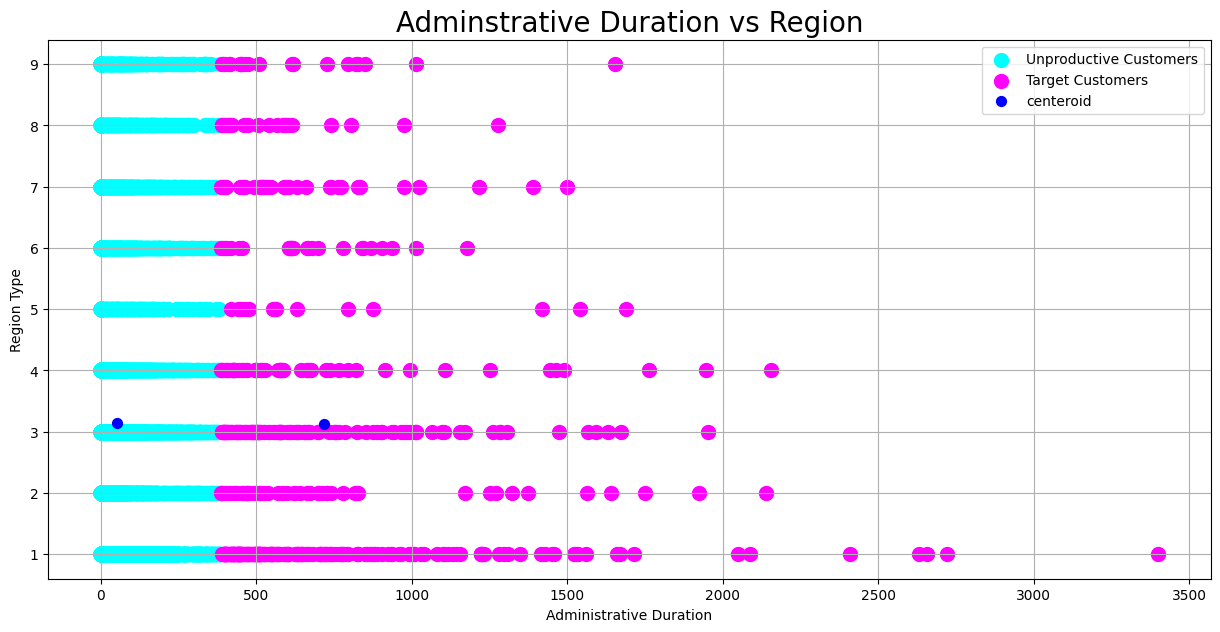

In [67]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'cyan', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [69]:

df1 = pd.get_dummies(data)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [71]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Revenue'] = le.fit_transform(df1['Revenue'])
df1['Revenue'].value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

In [72]:
df1['Weekend'].value_counts()

Weekend
False    9462
True     2868
Name: count, dtype: int64

In [73]:


df1['Weekend'] = le.fit_transform(df1['Weekend'])
df1['Weekend'].value_counts()

Weekend
0    9462
1    2868
Name: count, dtype: int64

In [74]:
# Splitting dependent and independent variables(columns)
y = df1['Revenue']
x = df1.drop(['Revenue'], axis = 1)

print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (12330, 28)
Shape of y:  (12330,)


**Insights from customer segmentation:**

* Customers can be segmented into three main groups based on their browsing behavior:
    * **Uninterested customers:** These customers spend little time on the website and have high bounce rates.
    * **General customers:** These customers spend more time on the website and have lower bounce rates, but they are not as likely to make a purchase as target customers.
    * **Target customers:** These customers spend the most time on the website.
    **Impact of different features on customer purchase behavior:**

* The following features have the greatest impact on customer purchase behavior:
    * Administrative duration: Customers who spend more time on the website are more likely to make a purchase.
    * Informational duration: Customers who spend more time on the website reading informational content are more likely to make a purchase.
    * Product-related duration: Customers who spend more time browsing product pages are more likely to make a purchase.
    * Bounce rate: Customers with high bounce rates are less likely to make a purchase.
    * Exit rate: Customers with high exit rates are less likely to make a purchase.
    * Region: Customers from certain regions are more likely to make a purchase.
    * Traffic type: Customers who come to the website from certain traffic sources are more likely to make a purchase.

**Comparison of the performance of segmentation models and neural networks:**

* Segmentation models and neural networks can both be used to predict customer purchase behavior. However, neural networks typically perform better than segmentation models. This is because neural networks can learn more complex relationships between features and the target variable.

**Importance of feature selection in improving model accuracy:**

* Feature selection can help to improve model accuracy by removing features that are not relevant to the target variable. This can help to reduce overfitting and improve the generalization performance of the model.


In [76]:
# Splitting of the Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2, random_state = 0)


print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9864, 28)
Shape of y_train : (9864,)
Shape of x_test : (2466, 28)
Shape of y_test : (2466,)


# Modelling : Support Vector Machine

In [78]:
# model define and training
model = svm.SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.8514801297648013
Testing Accuracy:  0.8317112733171127


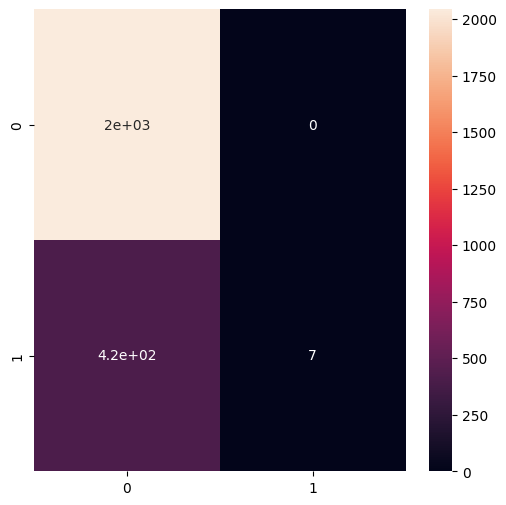

In [79]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [80]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2044
         1.0       1.00      0.02      0.03       422

    accuracy                           0.83      2466
   macro avg       0.92      0.51      0.47      2466
weighted avg       0.86      0.83      0.76      2466



# Modelling: Naive Bayes

In [81]:
# model define and training
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.7981549067315491
Testing Accuracy:  0.7899432278994323


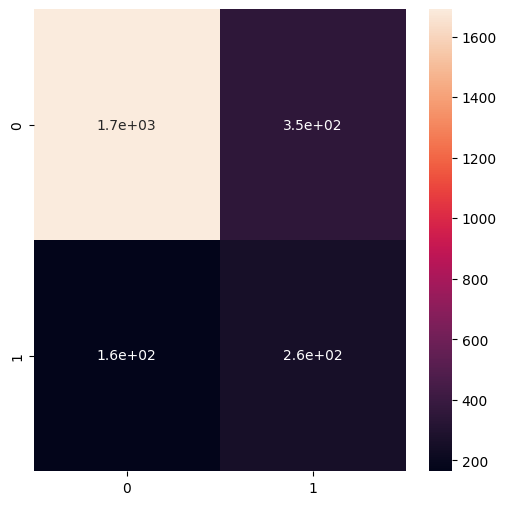

In [82]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [83]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      2044
         1.0       0.42      0.61      0.50       422

    accuracy                           0.79      2466
   macro avg       0.67      0.72      0.68      2466
weighted avg       0.83      0.79      0.80      2466



In [87]:
!pip install keras

# Neaural Network

In [90]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1)


mse = model.evaluate(x_test, y_test, verbose=0)
print(f'MSE: {mse}')

Epoch 1/10
78/78 [==============================] - 3s 7ms/step - loss: 1052.5255
Epoch 2/10
78/78 [==============================] - 0s 6ms/step - loss: 15.3690
Epoch 3/10
78/78 [==============================] - 1s 7ms/step - loss: 6.3582
Epoch 4/10
78/78 [==============================] - 0s 4ms/step - loss: 9.8874
Epoch 5/10
78/78 [==============================] - 0s 5ms/step - loss: 14.3855
Epoch 6/10
78/78 [==============================] - 0s 4ms/step - loss: 4.6801
Epoch 7/10
78/78 [==============================] - 0s 4ms/step - loss: 3.3177
Epoch 8/10
78/78 [==============================] - 0s 4ms/step - loss: 7.0997
Epoch 9/10
78/78 [==============================] - 0s 5ms/step - loss: 10.1258
Epoch 10/10
78/78 [==============================] - 0s 4ms/step - loss: 2.4540
MSE: 1.448874592781067


In [91]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
309/309 [==============================] - 1s 2ms/step - loss: 699.7189
Epoch 2/10
309/309 [==============================] - 1s 2ms/step - loss: 6.3136
Epoch 3/10
309/309 [==============================] - 1s 2ms/step - loss: 9.0517
Epoch 4/10
309/309 [==============================] - 1s 2ms/step - loss: 27.6887
Epoch 5/10
309/309 [==============================] - 1s 2ms/step - loss: 2.8516
Epoch 6/10
309/309 [==============================] - 1s 2ms/step - loss: 240.3083
Epoch 7/10
309/309 [==============================] - 1s 2ms/step - loss: 116.6209
Epoch 8/10
309/309 [==============================] - 1s 2ms/step - loss: 42.9380
Epoch 9/10
309/309 [==============================] - 1s 2ms/step - loss: 1.0166
Epoch 10/10
309/309 [==============================] - 1s 2ms/step - loss: 4.2429


In [92]:
model.evaluate(x_test, y_test)

78/78 [==============================] - 0s 2ms/step - loss: 2.7308


2.730811357498169

In [93]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras import regularizers


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1)


mse = model.evaluate(x_test, y_test, verbose=0)
print(f'MSE: {mse}')


Epoch 1/10
78/78 [==============================] - 1s 2ms/step - loss: 9268.2510
Epoch 2/10
78/78 [==============================] - 0s 2ms/step - loss: 2587.9866
Epoch 3/10
78/78 [==============================] - 0s 2ms/step - loss: 2571.1580
Epoch 4/10
78/78 [==============================] - 0s 2ms/step - loss: 1215.4630
Epoch 5/10
78/78 [==============================] - 0s 2ms/step - loss: 895.9174
Epoch 6/10
78/78 [==============================] - 0s 2ms/step - loss: 791.0113
Epoch 7/10
78/78 [==============================] - 0s 2ms/step - loss: 842.3472
Epoch 8/10
78/78 [==============================] - 0s 2ms/step - loss: 439.7284
Epoch 9/10
78/78 [==============================] - 0s 2ms/step - loss: 305.6508
Epoch 10/10
78/78 [==============================] - 0s 2ms/step - loss: 269.0597
MSE: 11.991728782653809


**Logistic Regression**

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error


log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)


log_reg_pred = log_reg_model.predict(x_test)
log_reg_mse = mean_squared_error(y_test, log_reg_pred)
print(f'Logistic Regression MSE: {log_reg_mse}')


Logistic Regression MSE: 0.12814274430274963


Logistic regression is better with a mean square error of 0.128

In [96]:
from sklearn.metrics import accuracy_score, classification_report

In [97]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

Accuracy: 0.7899432278994323
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      2044
         1.0       0.42      0.61      0.50       422

    accuracy                           0.79      2466
   macro avg       0.67      0.72      0.68      2466
weighted avg       0.83      0.79      0.80      2466



## Summary Table based on Two Learning Algorithm

In [98]:
precision = ['Naive Bayes', 'precision', 0.91, 0.42]
recall = ['Naive Bayes', 'recall', 0.83, 0.61]
f1_score = ['Naive Bayes', 'f1_score', 0.87, 0.50 ]
precision2 = ['Support Vector Machine', 'precision', 0.83, 0.00 ]
recall2 = ['Support Vector Machine', 'recall', 1.0, 0.00 ]
f1_score2 = ['Support Vector Machine', 'f1_score', 0.91, 0.00 ]
table = pd.DataFrame([precision, precision2, recall, recall2, f1_score, f1_score2])
table.columns = ['model_name', 'metrics', 'Is_Revenue(False)', 'Is_Revenue(True)']
table

,model_name,metrics,Is_Revenue(False),Is_Revenue(True)
0,Naive Bayes,precision,0.91,0.42
1,Support Vector Machine,precision,0.83,0.00
2,Naive Bayes,recall,0.83,0.61
3,Support Vector Machine,recall,1.00,0.00
4,Naive Bayes,f1_score,0.87,0.50
5,Support Vector Machine,f1_score,0.91,0.00


array([[<Axes: title={'center': 'Is_Revenue(False)'}>,
        <Axes: title={'center': 'Is_Revenue(True)'}>]], dtype=object)

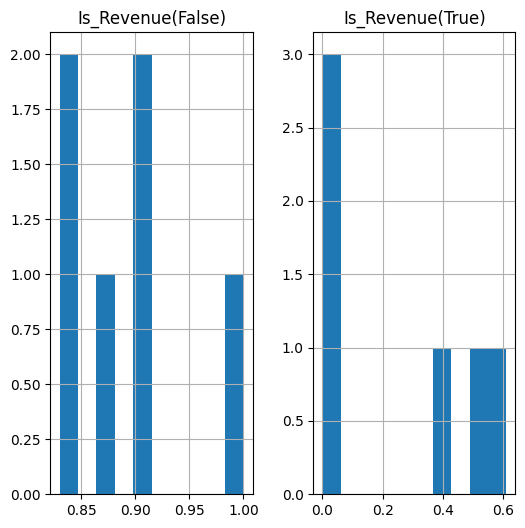

In [99]:
table.hist()